# Homework 0 Solutions

In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt, pandas as pd
from scipy import stats

### Problem 1

Since we assume the dart falls uniformly at random on the board, the probability that the dart falls within a certain region is proportional to the area of that region.
The area of the portion of the dartboard within $x$ cm of the center is $\pi x^2 \,\mathrm{cm}^2$, and the total area of the dartboard is $\pi 10^2 \,\mathrm{cm}^2$. So,
$$F(x) = \mathrm{Pr}(X \leq x) = \frac{\pi x^2 \,\mathrm{cm}^2}{\pi 10^2 \,\mathrm{cm}^2} = \frac{x^2}{100}$$
For reference, we plot this function below:

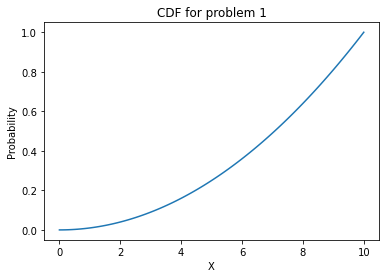

In [2]:
plt.plot(np.linspace(0, 10, 100), 0.01 * np.linspace(0, 10, 100) ** 2)
plt.title('CDF for problem 1')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

### Problem 2

This is a tail probability in a normal distribution, represented by the following graph:

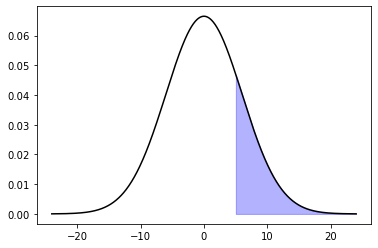

In [3]:
x = np.linspace(-24, 24, 1000)
y = sp.stats.norm.pdf(x, 0, 6)
plt.plot(x, y, 'k-')
plt.fill_between(x[x>5], np.zeros_like(x[x>5]), y[x>5], color = 'blue', alpha = 0.3)
plt.show()

We calculate it below:

In [4]:
1 - sp.stats.norm.cdf(5, 0, 6)

0.20232838096364314

### Problem 3

This is similar to the previous problem, but we now treat both the bus's departure time and my arrival time as random variables. Letting $t_a$, $t_d$ be my arrival time and the bus's departure time respectively, and defining noon to be time 0, we have
$$
\begin{align*}
t_a &\sim \mathrm{Normal}(-3, 5^2) \\
t_d &\sim \mathrm{Normal}(0, 6^2)
\end{align*}
$$
I will miss the bus if $t_d - t_a < 0$; that is, if my arrival time falls after the bus's departure. By standard properties of normal random variables,
$$
t_d - t_a \sim \mathrm{Normal}(3, 5^2 + 6^2)
$$
so we can calculate the appropriate tail probability as below:

In [5]:
sp.stats.norm.cdf(0, 3, np.sqrt(5**2 + 6**2))

0.35044822292823263

### Problem 4

Applying Bayes' theorem:

$$
\mathrm{Pr}(\mbox{twin is identical} | \mbox{twin is a boy}) = \frac{\mathrm{Pr}(\mbox{twin is a boy} | \mbox{twin is identical}) \mathrm{Pr}(\mbox{twin is identical})}{\mathrm{Pr}(\mbox{twin is a boy} | \mbox{twin is identical}) \mathrm{Pr}(\mbox{twin is identical}) + \mathrm{Pr}(\mbox{twin is a boy} | \mbox{twin is fraternal}) \mathrm{Pr}(\mbox{twin is fraternal})}
$$

Plugging in numbers,
$$
\mathrm{Pr}(\mbox{twin is identical} | \mbox{twin is a boy}) = \frac{1 \times \frac{1}{300}}{1 \times \frac{1}{300} + \frac{1}{2} \times \frac{1}{125}} \approx 0.455
$$

### Problem 5

These events are pairwise independent, but not mutually independent. The reason that they are not mutually independent is that any one of them is determined by the other two: for example, if $A, B$ hold, then $C$ must hold.

Quantitatively, as an example,
$$
\mathrm{Pr}(A) = \mathrm{Pr}(B) = \mathrm{Pr}(C) = 1/365
$$
and,
$$
\mathrm{Pr}(A \cap B) = 1/365^2 = \mathrm{Pr}(A) \mathrm{Pr}(B)
$$
However, because $A \cap B$ implies $C$, we also have
$$
\mathrm{Pr}(A \cap B \cap C) = 1/365^2 \neq \mathrm{Pr}(A) \mathrm{Pr}(B) \mathrm{Pr}(C)
$$

### Problem 6

Part a:

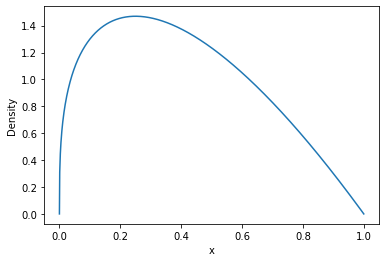

In [6]:
dst = sp.stats.beta(4/3, 2)
x = np.linspace(0, 1, 1000)
plt.plot(x, dst.pdf(x))
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

Part b. The histogram below shows a good visual resemblance to the density curve above.

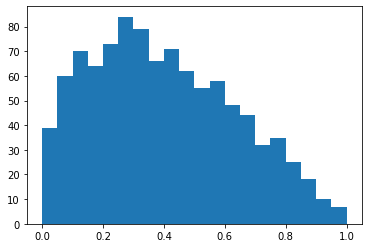

In [7]:
sample = dst.rvs(1000)
plt.hist(sample, bins = np.arange(0, 1.05, 0.05))
plt.show()

Part c.

In [8]:
np.average(sample)

0.3995653276304788

In [9]:
np.std(sample, ddof=1)

0.23446658513794918

Part d.

In [10]:
(np.quantile(sample, 0.025), np.quantile(sample, 0.975))

(0.03935248409548781, 0.8791617750804687)

### Problem 7

Part a.

Let $p^{-1}$ be the number of sides on the die selected, so that $p$ is the probability that any individual roll comes up heads.
Conditional on $p^{-1}$, the distribution of the number of 1s is $\mathrm{Binomial}(1000, p)$, so the marginal distribution is
$$
y \sim 0.25 \mathrm{Binomial}(1000, 1/4) + 0.5 \mathrm{Binomial}(1000, 1/6) + 0.25 \mathrm{Binomial}(1000, 1/12)
$$

For the purposes of plotting, we'll use the normal approximation for the binomial proportion:
$$
\frac{1}{n} \mathrm{Binomial}(n, p) \approx \mathrm{Normal}\left(p, \sqrt{\frac{p(1-p)}{n}}\right)
$$

Here is a plot:

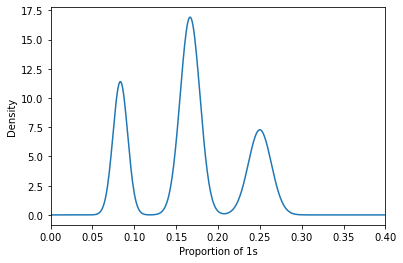

In [11]:
x = np.linspace(0, 1, 1000)
y = 0.25 * sp.stats.norm.pdf(x, 1/4, np.sqrt((1/4) * (3/4) / 1000)) + \
    0.5 * sp.stats.norm.pdf(x, 1/6, np.sqrt((1/6) * (5/6) / 1000)) + \
    0.25 * sp.stats.norm.pdf(x, 1/12, np.sqrt((1/12) * (11/12) / 1000))  
plt.plot(x, y)
plt.xlim(0, 0.4)
plt.xlabel('Proportion of 1s')
plt.ylabel('Density')
plt.show()

Part b. Here, we define a function to simulate this process, and call it to create a sample.

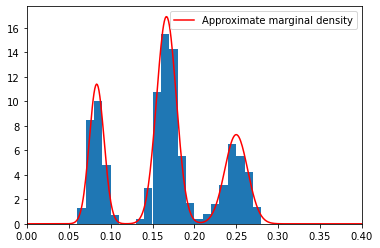

In [12]:
def roll_dice():
    pinv = np.random.choice([4, 6, 6, 12])
    return sp.stats.binom.rvs(1000, 1/pinv) / 1000

sample = np.array([roll_dice() for i in range(1000)])

plt.hist(sample, bins = np.arange(0, 0.41, 0.01), density = True)
plt.plot(x, y, 'r-', label = 'Approximate marginal density')
plt.xlim(0, 0.4)
plt.legend()
plt.show()

In [13]:
1/12 + 4 * np.sqrt((1/12)*(11/12) / 1000)

0.11829362827233839

Part c. Using the normal approximation:
* we estimate the 5% point as the 20% point of the leftmost peak, about 0.076
* we estimate the 25% point as the 99.9% point of the leftmost peak, about 0.110
* the 50% point is the center of the middle peak, or 1/6, about 0.167
* we estimate the 75% point as the 99.9% point of the middle peak, about 0.203
* we estimate the 95% point as the 80% point of the rightmost peak, about 0.262

Calculation below:

In [14]:
print(sp.stats.norm.ppf(0.2, 1/12, np.sqrt((1/12) * (11/12) / 1000)))
print(sp.stats.norm.ppf(0.999, 1/12, np.sqrt((1/12) * (11/12) / 1000)))
print(sp.stats.norm.ppf(0.999, 1/6, np.sqrt((1/6) * (5/6) / 1000)))
print(sp.stats.norm.ppf(0.8, 1/4, np.sqrt((1/4) * (3/4) / 1000)))

0.07597750169517374
0.11034219154675046
0.20308540365221672
0.2615243733625802


### Problem 8

Part a.

The marginal PMF of $X$ is:
$$
\begin{array}{|c|c|c|c|} \hline
x & 1 & 2 & 3 \\ \hline
\mathrm{Pr}(x) & 1/3 & 1/2 & 1/6 \\ \hline
\end{array}
$$
and of $Y$:

$$
\begin{array}{|c|c|c|c|c|} \hline
y & 0 & 1 & 2 & 3 \\ \hline
\mathrm{Pr}(y) & 3/15 & 3/15 & 5/15 & 4/15 \\ \hline
\end{array}
$$

To show that these are not independent, it's enough to show a pair $x, y$ such that 
$$\mathrm{Pr}(X = x, Y = y) \neq \mathrm{Pr}(X = x)\mathrm{Pr}(Y = y)$$
The easy example is $x = 3, y = 2$, where $\mathrm{Pr}(X = x, Y = y) = 0$ but neither factor is 0.

Alternatively, we can use matrix multiplication to compute what the joint distribution would be if they were independent:

In [15]:
x = np.array([[1/3, 1/2, 1/6]])
y = np.array([[3/15, 3/15, 5/15, 4/15]])
x.T @ y

array([[0.06666667, 0.06666667, 0.11111111, 0.08888889],
       [0.1       , 0.1       , 0.16666667, 0.13333333],
       [0.03333333, 0.03333333, 0.05555556, 0.04444444]])

Some of the joint probabilities match the table, but many do not.